In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['smoker']=encode.fit_transform(df['smoker'])
df['sex']=encode.fit_transform(df['sex'])
df['region']=encode.fit_transform(df['region'])

Text(0.5, 1.0, 'Correlation Between Variables')

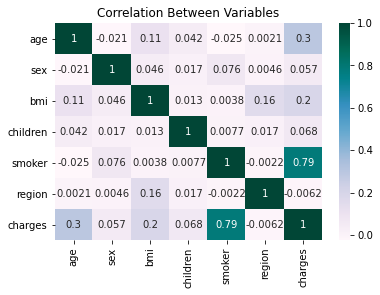

In [5]:
corr = df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap = 'PuBuGn')
plt.title("Correlation Between Variables")

# Logistic Regression

In [6]:
x = df.drop('smoker',axis=1).values
y = df['smoker'].values

In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)


LogisticRegression()

In [10]:
ypred =  log.predict(x_test)

0.9514925373134329
[[205   5]
 [  8  50]]


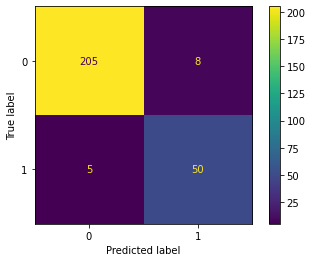

In [11]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix
print(accuracy_score(ypred,y_test))
print(confusion_matrix(ypred,y_test))
plot_confusion_matrix(log,x_test,y_test)

# Multi Linear Regression

In [12]:
x=df.drop('charges',axis=1).values
y=df.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))



0.799874714544996


# Regression using ANN 

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

model=Sequential()
model.add(Dense(36,input_dim=6,activation = 'relu'))

model.add(Dense(18,activation='relu'))
model.add(keras.layers.normalization.BatchNormalization())

model.add(Dense(1,activation='linear'))

opt =keras.optimizers.Adam(lr=0.0015)

model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model.fit(x_train,y_train,epochs = 300 ,batch_size=13,validation_split=0.1)

Epoch 1/300
75/75 [==============================] - 1s 3ms/step - loss: 326844131.7895 - rmse: 13359.3490 - val_loss: 383979072.0000 - val_rmse: 14166.5049
Epoch 2/300
75/75 [==============================] - 0s 1ms/step - loss: 343305377.6842 - rmse: 13754.4339 - val_loss: 383873088.0000 - val_rmse: 14165.8770
Epoch 3/300
75/75 [==============================] - 0s 1ms/step - loss: 292118799.1579 - rmse: 12769.9196 - val_loss: 383682304.0000 - val_rmse: 14165.0361
Epoch 4/300
75/75 [==============================] - 0s 1ms/step - loss: 312058929.2632 - rmse: 13124.9140 - val_loss: 383406816.0000 - val_rmse: 14162.4424
Epoch 5/300
75/75 [==============================] - 0s 1ms/step - loss: 310952768.4211 - rmse: 13020.3461 - val_loss: 383104288.0000 - val_rmse: 14158.9531
Epoch 6/300
75/75 [==============================] - 0s 1ms/step - loss: 301212993.0526 - rmse: 12941.7008 - val_loss: 382743328.0000 - val_rmse: 14154.1660
Epoch 7/300
75/75 [==============================] - 0s 1m

In [25]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 36)                252       
_________________________________________________________________
dense_9 (Dense)              (None, 18)                666       
_________________________________________________________________
batch_normalization_2 (Batch (None, 18)                72        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 19        
Total params: 1,009
Trainable params: 973
Non-trainable params: 36
_________________________________________________________________
None


In [26]:
y_predict = model.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.877933095650882


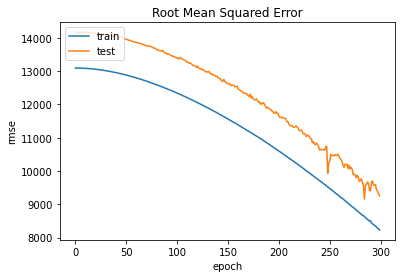

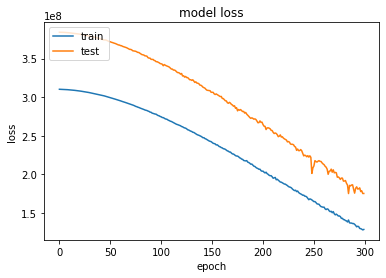

In [23]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()